<a href="https://colab.research.google.com/github/RichardXiao13/Google_Code_In/blob/master/tensorboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TensorBoard.dev**
Tensorflow offers a great toolkit known as TensorBoard for visualizing machine learning experiments! With it, you can understand your models with more ease. In this notebook, we will train a simple model for classifying different foods and use TensorBoard to help us understand our model.

# **Setup**
To begin, we will import the necessary modules. We will be using the Food101 dataset offered on Tensorflow Datasets for our training data. To use TensorBoard, we must first install it using pip.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

TensorFlow 2.x selected.


In [0]:
!pip install -U tensorboard >piplog 2>&1

In [0]:
dataset = tfds.load('food101', as_supervised=True)
train_data = dataset['train']

# **Preprocessing**
Before we can use the data for training, we must make sure that all the data is of the same size and normalized. To do this, we will create a function to be mapped onto our dataset. During training, this will resize the images to the desired size, in this case, `(256, 256)`, and with pixels in between the range `[0,1]`.

In [0]:
def preprocessing(image, label):
  img = tf.image.resize(image, (256, 256))/255
  return img, label

In [0]:
train_data = train_data.map(preprocessing).batch(150)

# **Model**
For this task of classifying foods, we will use multiple convolutional layers and downsampling to extract the most important features. We also use dropout layers to reduce overfitting on the data. Then, we will flatten the images after the last downsampling layer so that we can classify the images using a softmax fully connected layer. The softmax layer just outputs probabilities for each class, so we will have to manipulate this output during our predictions.

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(256, 256, 3)),
                             tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D((2, 2)),

                             tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.MaxPooling2D((2, 2)),

                             tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.MaxPooling2D((2, 2)),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1024, activation='relu'),
                             tf.keras.layers.Dense(101, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 64)       

# **TensorBoard Callback**
Once we have built our model, we are ready to use Tensorboard to keep track of certain features during training. To do this, we will create a callback using TensorBoard and set the logs to a logging directory. When we call the `fit()` method for training, we can pass in this callback.

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
log_dir = '/content/logs/fit'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_data, epochs=30, callbacks=[tensorboard_callback])

Epoch 1/30
674/674 [==============================] - 140s 207ms/step - loss: 4.1481 - accuracy: 0.0765
Epoch 2/30
674/674 [==============================] - 142s 211ms/step - loss: 3.5200 - accuracy: 0.1733
Epoch 3/30
674/674 [==============================] - 139s 206ms/step - loss: 3.0300 - accuracy: 0.2614
Epoch 4/30
674/674 [==============================] - 140s 208ms/step - loss: 2.5672 - accuracy: 0.3511
Epoch 5/30
674/674 [==============================] - 138s 205ms/step - loss: 2.1631 - accuracy: 0.4379
Epoch 6/30
674/674 [==============================] - 139s 206ms/step - loss: 1.8149 - accuracy: 0.5137
Epoch 7/30
674/674 [==============================] - 139s 206ms/step - loss: 1.5127 - accuracy: 0.5828
Epoch 8/30
674/674 [==============================] - 138s 204ms/step - loss: 1.2821 - accuracy: 0.6393
Epoch 9/30
674/674 [==============================] - 139s 206ms/step - loss: 1.0909 - accuracy: 0.6862
Epoch 10/30
674/674 [==============================] - 137s 204m

In [0]:
model.save('food_classifier.h5')

# **Upload Logs**
Once training is finished. We can upload the directory with our logs to TensorBoard. It will then give a link which directs us to a webpage where we can see different metrics while our model trained. The link for this notebook is located [here](https://tensorboard.dev/experiment/QM7cylu5RIG8ybrycgky5A/#scalars&runSelectionState=eyJmaXQvdHJhaW4iOnRydWV9). On the page, you will see graphs of the training loss and accuracy. Hovering over the graphs allows you to see more information such as the time the loss/accuracy was measured, the time it took relative to starting training, the epoch step, and the precise value.

In [0]:
! tensorboard dev upload --logdir ./logs

# **Visualize Predictions**
We can test some images of food and see if the labels are accurate. To do this, we must first get the labels text file located at https://github.com/alpapado/food-101/blob/master/data/meta/labels.txt. Then, we can read the text file and separate the labels based on new lines. We will also use matplotlib to plot our test images. Since our predictions are tensors with probabilities of size `(1, 101)`, we have to use `tf.argmax()` on `axis=-1` to get the most likely label for our prediction.

In [0]:
import matplotlib.pyplot as plt
import os

sample_images_path = '/content/sample_images'
lbls_path = '/content/labels.txt'
with open(lbls_path, mode='r') as labels:
  labels = labels.read().split('\n')

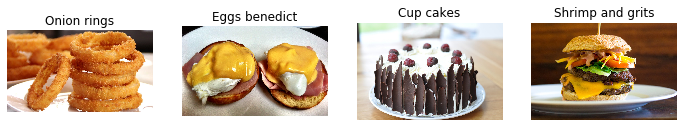

In [0]:
f = plt.figure(figsize=(12, 20))
for i, images in enumerate(os.listdir(sample_images_path)):
  img = plt.imread(os.path.join(sample_images_path, images))
  plt.subplot(1, len(os.listdir(sample_images_path)), i+1)
  plt.axis('off')
  plt.imshow(img)
  img = tf.image.resize(img, (256, 256))/255
  img = tf.expand_dims(img, axis=0)
  pred = model.predict(img)
  pred = tf.argmax(pred, axis=-1).numpy()[0]
  plt.title(labels[pred])

# **Conclusion**
Our model shows some signs of overfitting on the training data. The third and fourth images are clearly not cup cakes or shrimp and grits. However, our image labelled cup cakes is not the most clear representation of a chocolate cake with its jagged shards. Even with that, we can improve our model by adding a validation set during training to see if our accuracies begin to diverge. We can even play around with the number of parameters and layers in our model to see if different combinations give better results. You can easily log these to TensorBoard to compare trainings across multiple experiments!